<h1 style = "color:#C3447A">CARBON EMMISSIONS IMPACT ANALYSIS</h1>


<h3 style = "color:#005871">--> importing the necessary Python libraries and the dataset</h3>

In [3]:
import pandas as pd 

# loading the datasets 
temp_data = pd.read_csv("E:/python_cybrom/Carbon Emissions Wordwide/temperature.csv")

carbon_data = pd.read_csv("E:/python_cybrom/Carbon Emissions Wordwide/carbon_emmission.csv")

In [9]:
temp_data.head()

,ObjectId,Country,ISO2,ISO3,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,F1971,F1972,F1973,F1974,F1975,F1976,F1977,F1978,F1979,F1980,F1981,F1982,F1983,F1984,F1985,F1986,F1987,F1988,F1989,F1990,F1991,F1992,F1993,F1994,F1995,F1996,F1997,F1998,F1999,F2000,F2001,F2002,F2003,F2004,F2005,F2006,F2007,F2008,F2009,F2010,F2011,F2012,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,0.619,-1.124,0.232,-0.489,-0.445,-0.286,0.513,0.129,0.361,0.600,0.483,-0.346,0.164,0.145,0.283,-0.141,0.391,0.919,-0.205,0.730,-0.168,-0.294,0.220,0.430,0.359,-0.116,0.471,0.675,1.198,0.993,1.311,1.365,0.587,1.373,0.401,1.720,0.675,0.704,0.895,1.613,1.397,0.223,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,-0.195,-0.069,-0.288,-0.139,-0.211,-0.683,0.545,-0.814,0.203,-0.414,-0.351,0.173,-0.128,-0.270,-0.103,0.569,-0.106,0.370,-0.066,0.795,-0.269,0.106,0.076,1.330,-0.172,-0.038,0.075,0.795,0.670,1.065,1.532,0.492,0.970,0.444,0.189,0.345,1.316,0.978,0.910,1.191,1.055,1.487,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,-0.385,-0.348,-0.015,-0.503,-0.539,-0.782,0.504,0.012,0.654,0.232,0.215,0.399,0.560,-0.004,0.508,0.296,0.975,1.304,0.386,1.266,0.031,-0.312,0.552,0.732,0.595,0.846,1.059,1.109,1.476,0.820,1.856,1.258,1.585,0.988,1.264,1.395,1.220,1.185,0.945,2.265,1.398,1.147,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,4,American Samoa,AS,ASM,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,-0.477,-0.067,0.330,-0.308,-0.118,-0.177,0.156,0.092,0.341,0.350,0.179,0.280,0.313,0.277,0.256,0.394,0.354,0.509,0.143,0.497,0.641,0.344,-0.069,0.189,0.755,0.784,NaN,NaN,0.242,0.626,0.904,1.152,0.716,0.191,0.801,0.403,1.032,0.670,NaN,1.311,0.854,0.924,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,5,"Andorra, Principality of",AD,AND,0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,-0.326,-0.499,0.025,-0.371,0.246,-0.045,-0.093,-0.163,0.058,-0.188,0.178,1.044,0.859,-0.157,0.059,0.387,0.397,0.883,1.162,1.736,0.231,0.386,0.174,1.508,1.279,0.570,1.788,1.018,1.055,1.050,1.480,0.835,1.949,0.936,0.851,1.485,1.024,0.946,1.413,0.471,1.677,1.265,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [6]:
carbon_data.head()

,ObjectId,Country,Date,Value
0,1,World,1958M03,315.70
1,2,World,1958M04,317.45
2,3,World,1958M05,317.51
3,4,World,1958M06,317.24
4,5,World,1958M07,315.86


In [10]:
temp_data.shape

(225, 66)

In [11]:
carbon_data.shape

(1570, 4)

<h3 style = "color:#005871">--> Selecting and computing statistics</h3>

In [12]:
# for temprature dataset
temperature_values = temp_data.filter(regex= '^F').stack()  #extracting all year columns and Combine them into one single Series 
                                                            #where column names become part of the index
temperature_stats = {
    "Mean" : temperature_values.mean(),
    "Median" : temperature_values.median(), 
    "Varince" : temperature_values.var()
}

# for co2 dataset 
co2_values= carbon_data['Value']

co2_stats = {
    "Mean" : co2_values.mean(),
    "Median" : co2_values.median(),
    "Varience" : co2_values.var()
}

temperature_stats, co2_stats

({'Mean': 0.5377713483146068, 'Median': 0.47, 'Varince': 0.4294524831504378},
 {'Mean': 180.71615286624203,
  'Median': 313.835,
  'Varience': 32600.00200469294})

<h3 style = "color:#005871">--> Time-Series Analysis</h3>

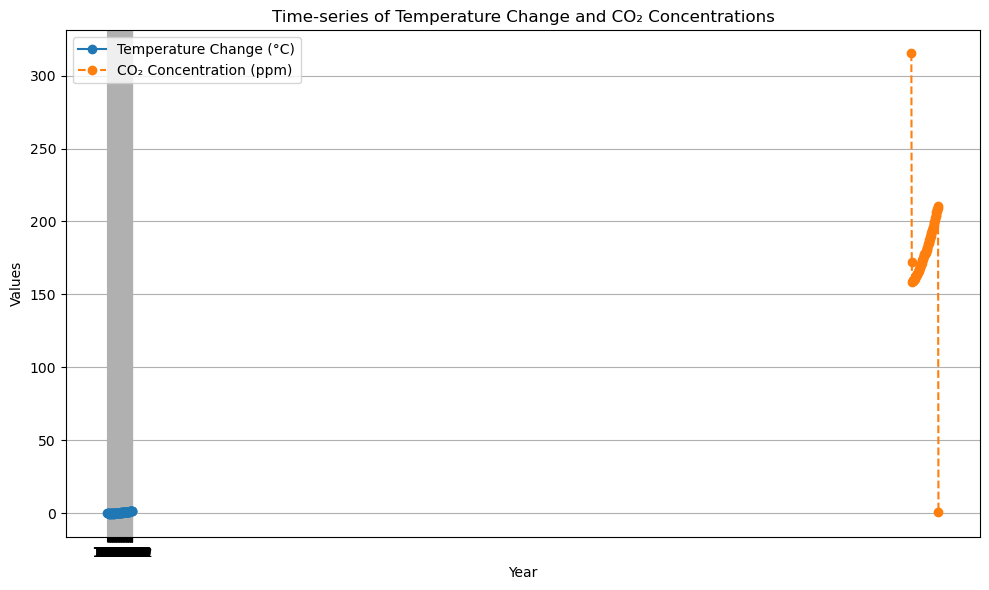

In [15]:
import matplotlib.pyplot as plt

#temperature: averaging across countries for each year
temperature_years = temp_data.filter(regex='^F').mean(axis=0)
temperature_years.index = temperature_years.index.str.replace('F', ' ')

#CO2: parsing year and averaging monthly data 
carbon_data['Year'] = carbon_data['Date'].str[:4].astype(int)
co2_yearly = carbon_data.groupby('Year')['Value'].mean()

plt.figure(figsize=(10, 6))
plt.plot(temperature_years.index, temperature_years.values, label="Temperature Change (°C)", marker='o')
plt.plot(co2_yearly.index, co2_yearly.values, label="CO₂ Concentration (ppm)", linestyle='--', marker='o')

plt.title("Time-series of Temperature Change and CO₂ Concentrations")
plt.xlabel("Year")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
import seaborn as sns

# Assuming temperature_years and co2_yearly are already defined and aligned by year
merged_data = pd.DataFrame({
    "Temperature Change": temperature_years,
    "CO₂ Concentration": co2_yearly
}).dropna()

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(
    merged_data.corr(),
    annot=True,       # Show correlation values
    fmt=".2f",        # Format decimal to 2 places
    cmap="RdBu_r",    # Diverging color map (reversed RdBu)
    center=0          # Center the colormap at 0
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


TypeError: '<' not supported between instances of 'int' and 'str'